/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - loss: 4.2697 - val_loss: 5.6514
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 4.4223 - val_loss: 5.1524
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 3.6484 - val_loss: 4.7024
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 3.5667 - val_loss: 4.2813
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 3.1579 - val_loss: 3.8944
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 2.6678 - val_loss: 3.5324
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 2.4692 - val_loss: 3.1667
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2.3022 - val_loss: 2.8235
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 1.7365 - val_loss: 2.5030
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 1.8014 - val_loss: 2.1954
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 1.3617 - val_loss: 1.9200
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.1985 - val_l

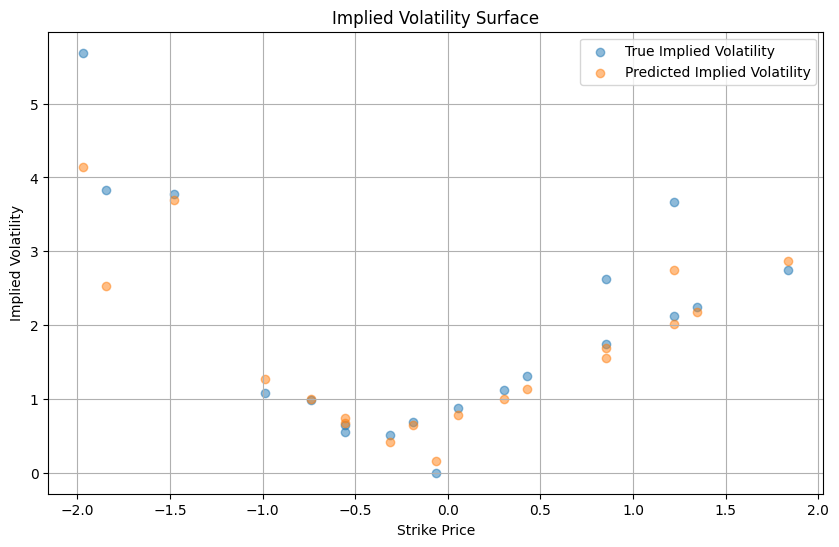

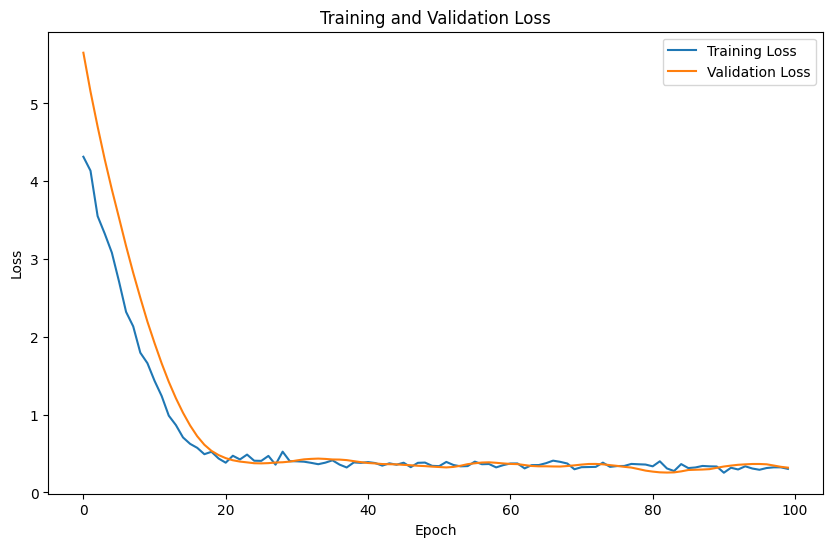

In [2]:
#| code-fold: true
#| label: Volatility_Surface_Neural_Network
import numpy as np
import pandas as pd
import yfinance as yf
import setuptools.dist
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt


# Fetch options data from Yahoo Finance
ticker = "AMZN"
stock = yf.Ticker(ticker)
expiry = stock.options[0]
opt_chain = stock.option_chain(expiry)
calls = opt_chain.calls[['strike', 'lastPrice', 'impliedVolatility']].copy()
puts = opt_chain.puts[['strike', 'lastPrice', 'impliedVolatility']].copy()

# Combine call and put data
options_data = pd.concat([calls, puts])
options_data.dropna(inplace=True)

# Prepare the data
X = options_data[['strike', 'lastPrice']].values
y = options_data['impliedVolatility'].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict implied volatilities
y_pred = model.predict(X_test)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, label='True Implied Volatility', alpha=0.5)
plt.scatter(X_test[:, 0], y_pred, label='Predicted Implied Volatility', alpha=0.5)
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatility Surface')
plt.legend()
plt.grid(True)
plt.show()

# Optionally, plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()